In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
%matplotlib inline

#Número Top de Gens. En aquest cas vull els TOP100
n=100

#Fitxer que contè en TPM els gens més epxressats de manera ordenada decreixent.
teixits = pd.read_csv('D:/TFM/ANALISI_MODELS/Datasets/all_gensTPM_noversio_ZA.csv',sep =",")

In [2]:
#data = teixits.iloc[:, 1:4]
data=teixits

In [3]:
if (n==0 or n>(len(teixits.columns)-3)):
    n=len(teixits.columns)-3
    
data = teixits.iloc[:, 2:n+3]

In [4]:
data

,SMTSD,ENSG00000210082,ENSG00000198712,ENSG00000198899,ENSG00000198938,ENSG00000198804,ENSG00000198886,ENSG00000198763,ENSG00000198888,ENSG00000198727,...,ENSG00000111674,ENSG00000137154,ENSG00000109846,ENSG00000131771,ENSG00000110700,ENSG00000174444,ENSG00000113140,ENSG00000133169,ENSG00000109475,ENSG00000167815
0,Brain - Cortex,56000.0,59480,57190,43790,51600,48610,32840,36570,32050,...,524.3,327.2,396.4,158.7,338.6,377.1,77.16,425.0,306.5,493.6
1,Brain - Cerebellum,32100.0,49380,50440,37730,27340,45150,25620,30180,30980,...,1156.0,399.2,232.7,176.4,469.7,480.2,533.10,412.2,379.3,685.3
2,Brain - Cortex,59730.0,62980,66050,48110,75880,63390,32590,45930,31380,...,365.5,231.5,147.0,285.4,243.0,281.4,82.81,409.7,251.7,456.9
3,Brain - Cerebellum,44320.0,51110,50770,43170,60530,54370,28230,36340,31450,...,821.0,384.4,345.7,226.4,456.8,396.9,163.60,285.5,450.9,510.0
4,Brain - Cortex,45870.0,62790,47390,56100,70590,45050,36770,38690,29500,...,652.0,236.9,149.1,162.8,256.2,279.7,204.20,673.1,279.9,655.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,Brain - Cortex,66360.0,60430,54270,52260,54240,42870,26570,36790,26310,...,598.0,229.7,181.6,191.9,248.7,318.4,101.40,627.6,247.8,646.7
2637,Brain - Cerebellum,39830.0,44910,49800,38950,39790,52370,29630,35390,31610,...,945.3,435.9,366.5,292.3,481.1,467.5,484.50,347.0,422.5,523.8
2638,Brain - Cortex,56930.0,47760,49580,42730,51040,50630,38830,40840,30990,...,341.8,502.8,299.8,242.9,467.8,450.9,247.70,318.3,457.5,362.9
2639,Brain - Cerebellum,45720.0,56890,60010,41590,33670,46580,38390,42170,42080,...,512.2,332.8,256.2,298.7,493.0,367.1,1149.00,225.6,377.9,389.1


In [5]:
#Creació conjunt train i test

x,y=data.iloc[:, 1:n+1],data.iloc[:, 0]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

x_train = np.log2(x_train+1)
x_test = np.log2(x_test+1)

In [6]:
#Definim PCA

pca = PCA()

z= pca.fit_transform(x_train)

x_train_pca = z
x_test_pca  = pca.transform(x_test)

15 components expliquen un 95% de la variança. De 100 dimensions a 15


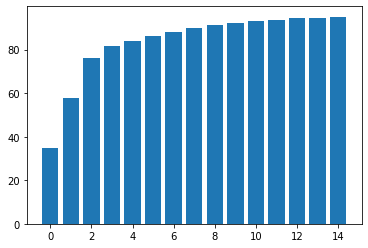

In [7]:
total = sum(pca.explained_variance_)

k = 0
current_variance = 0
while current_variance/total < 0.95:
    current_variance += pca.explained_variance_[k]
    k = k + 1
    
print(k, " components expliquen un 95% de la variança. De ",n," dimensions a ", k, sep='')

pca = PCA(n_components=k)

x_train.pca = pca.fit(x_train)
x_train_pca = pca.transform(x_train)

x_test_pca = pca.transform(x_test)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(k), var_exp);

In [8]:
#Dinàmicament agafo el numero de Dimensions de PCA: k

principalDf = pd.DataFrame(data = x_train_pca[:,0:k])
             #, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.997400,-3.848103,-1.348992,-1.074353,0.183537,-1.317938,-0.490626,-1.725964,0.192186,0.389275,0.044136,-0.045612,1.794794,-0.793048,1.362708
1,-3.056064,4.590105,6.523606,2.256338,-0.556944,-0.920708,0.311112,-0.320242,-0.652477,-0.360747,0.224121,-0.253545,-0.341470,-0.571634,0.646463
2,7.823238,-3.248898,3.735773,-4.060456,2.352864,4.766948,2.401906,0.200732,-1.118977,-2.136494,-2.503924,2.168519,0.580701,-0.834357,-0.405578
3,14.068903,-3.012009,3.624032,0.964824,-0.569823,0.070916,1.078589,0.381807,4.349176,0.673670,-0.532843,0.711755,-0.151081,-1.029856,-1.067012
4,4.126016,-4.567167,-0.201746,-0.067302,-0.417473,-0.834123,2.801781,-0.417659,-0.659354,-0.579162,0.116882,1.003686,-0.542590,0.456584,-0.406097


In [9]:
x_train_pca[:,0:11].shape

(2112, 11)

In [10]:
principalDf.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

finalDF = pd.concat([principalDf, y_train], axis=1)

finalDF.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,SMTSD
0,1.997400,-3.848103,-1.348992,-1.074353,0.183537,-1.317938,-0.490626,-1.725964,0.192186,0.389275,0.044136,-0.045612,1.794794,-0.793048,1.362708,Brain - Hippocampus
1,-3.056064,4.590105,6.523606,2.256338,-0.556944,-0.920708,0.311112,-0.320242,-0.652477,-0.360747,0.224121,-0.253545,-0.341470,-0.571634,0.646463,Brain - Cerebellum
2,7.823238,-3.248898,3.735773,-4.060456,2.352864,4.766948,2.401906,0.200732,-1.118977,-2.136494,-2.503924,2.168519,0.580701,-0.834357,-0.405578,Brain - Frontal Cortex (BA9)
3,14.068903,-3.012009,3.624032,0.964824,-0.569823,0.070916,1.078589,0.381807,4.349176,0.673670,-0.532843,0.711755,-0.151081,-1.029856,-1.067012,Brain - Nucleus accumbens (basal ganglia)
4,4.126016,-4.567167,-0.201746,-0.067302,-0.417473,-0.834123,2.801781,-0.417659,-0.659354,-0.579162,0.116882,1.003686,-0.542590,0.456584,-0.406097,Brain - Frontal Cortex (BA9)


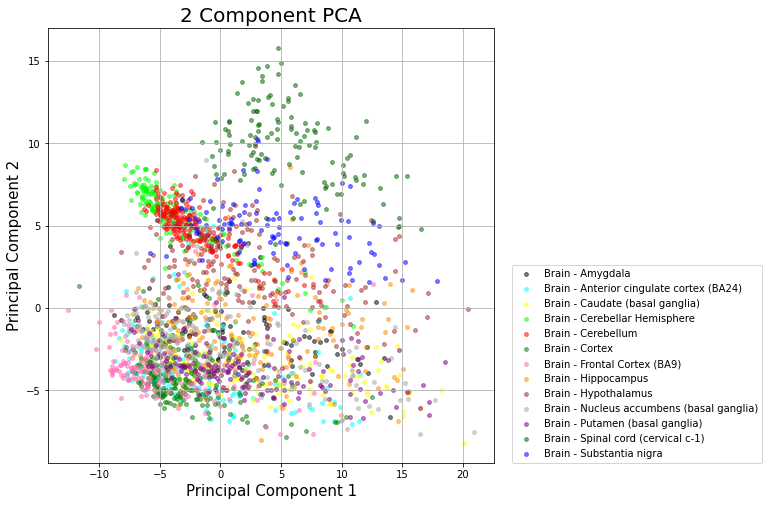

In [11]:
#Visualitzo la projecció 2D

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Brain - Amygdala',
           'Brain - Anterior cingulate cortex (BA24)',
           'Brain - Caudate (basal ganglia)',
           'Brain - Cerebellar Hemisphere',
           'Brain - Cerebellum',
           'Brain - Cortex',
           'Brain - Frontal Cortex (BA9)',
           'Brain - Hippocampus', 
           'Brain - Hypothalamus',       
           'Brain - Nucleus accumbens (basal ganglia)', 
           'Brain - Putamen (basal ganglia)',
           'Brain - Spinal cord (cervical c-1)',
           'Brain - Substantia nigra']

import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 13))

colors = {'red':   ((0.0, 0.0, 0.0),
                    (0.5, 0.0, 0.1),
                    (1.0, 1.0, 1.0)),

          'green': ((0.0, 0.0, 0.0),
                    (1.0, 0.0, 0.0)),

          'blue':  ((0.0, 0.0, 1.0),
                    (0.5, 0.1, 0.0),
                    (1.0, 0.0, 0.0))
          }

colors = {"black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"}

for target, color in zip(targets,colors):
    indicesToKeep = finalDF['SMTSD'] == target    
    ax.scatter(finalDF.loc[indicesToKeep, 0]
               , finalDF.loc[indicesToKeep, 1]
               , c = color               
               , s = 15, alpha=0.5)
ax.legend(targets, loc=(1.04,0))


ax.grid()

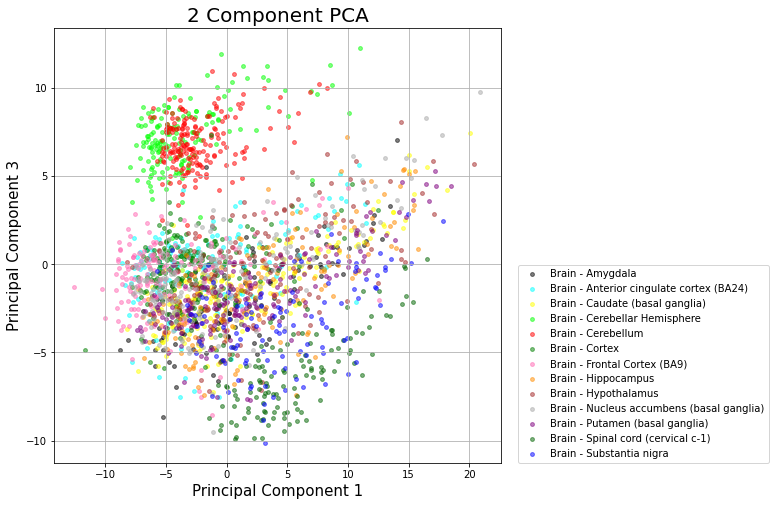

In [12]:

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Brain - Amygdala',
           'Brain - Anterior cingulate cortex (BA24)',
           'Brain - Caudate (basal ganglia)',
           'Brain - Cerebellar Hemisphere',
           'Brain - Cerebellum',
           'Brain - Cortex',
           'Brain - Frontal Cortex (BA9)',
           'Brain - Hippocampus', 
           'Brain - Hypothalamus',       
           'Brain - Nucleus accumbens (basal ganglia)', 
           'Brain - Putamen (basal ganglia)',
           'Brain - Spinal cord (cervical c-1)',
           'Brain - Substantia nigra']

import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 13))

colors = {'red':   ((0.0, 0.0, 0.0),
                    (0.5, 0.0, 0.1),
                    (1.0, 1.0, 1.0)),

          'green': ((0.0, 0.0, 0.0),
                    (1.0, 0.0, 0.0)),

          'blue':  ((0.0, 0.0, 1.0),
                    (0.5, 0.1, 0.0),
                    (1.0, 0.0, 0.0))
          }

colors = {"black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"}

for target, color in zip(targets,colors):
    indicesToKeep = finalDF['SMTSD'] == target    
    ax.scatter(finalDF.loc[indicesToKeep, 0]
               , finalDF.loc[indicesToKeep, 2]
               , c = color               
               , s = 15, alpha=0.5)
ax.legend(targets, loc=(1.04,0))


ax.grid()

<b>tSNE Perplexity 30</b>

In [13]:
tsne = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1, random_state=1234)

points = tsne.fit_transform(x_train)

tsne_df = pd.DataFrame({'X':points[:,0],
                        'Y':points[:,1],
                        'Tipus Teixit':y_train})
tsne_df.head()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2112 samples in 0.000s...
[t-SNE] Computed neighbors for 2112 samples in 0.229s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2112
[t-SNE] Computed conditional probabilities for sample 2000 / 2112
[t-SNE] Computed conditional probabilities for sample 2112 / 2112
[t-SNE] Mean sigma: 1.973010
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.266968
[t-SNE] KL divergence after 1000 iterations: 0.993699


,X,Y,Tipus Teixit
0,-16.121447,17.175400,Brain - Hippocampus
1,19.393444,-54.039257,Brain - Cerebellum
2,11.959066,24.790691,Brain - Frontal Cortex (BA9)
3,10.604226,33.406761,Brain - Nucleus accumbens (basal ganglia)
4,-15.411203,27.083803,Brain - Frontal Cortex (BA9)


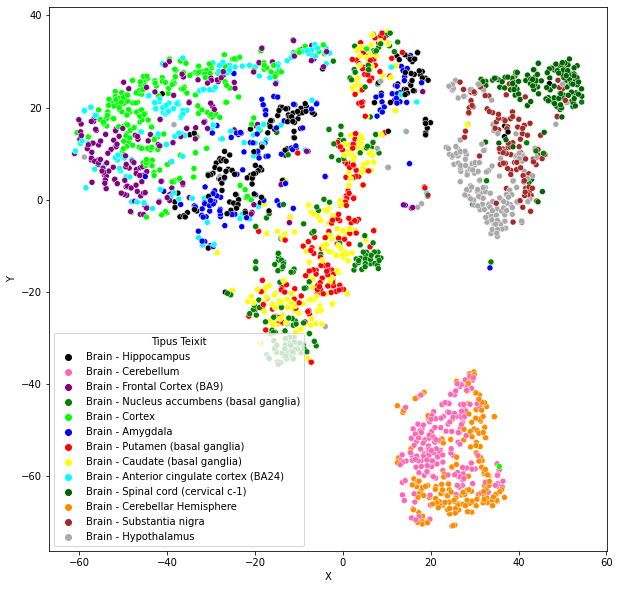

In [14]:
plt.figure(figsize=(10, 10))

sns.scatterplot(x="X", y="Y",
              hue="Tipus Teixit",
              palette=["black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"],
              #legend='full',              
              data=tsne_df);

<b>Realització de Models</b>

<b>Model Classificador kNN</b>

In [15]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={"n_neighbors":range(5,25), "weights": ["uniform","distance"]}


# Validació creuada
# ==============================================================================
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()


grid = GridSearchCV(model , param_grid = param_grid,
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,                           
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(kNN) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model2 = grid.best_estimator_

r_model2 = grid.best_score_

# Prediccions test
# ==============================================================================

prediccions2 = model2.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy2 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions2,
            normalize = True
           )
print("")
print(f"(kNN) El accuracy de test és: {100*accuracy2}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions2,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 40 candidates, totalling 400 fits
40 # Prec. mitjana:  69.74514888670302  desv.:  2.9519994850273465  paràmetres:  {'n_neighbors': 5, 'weights': 'uniform'}
37 # Prec. mitjana:  70.12407225252616  desv.:  2.9119637598225983  paràmetres:  {'n_neighbors': 5, 'weights': 'distance'}
33 # Prec. mitjana:  70.40887954931591  desv.:  2.8094632292984834  paràmetres:  {'n_neighbors': 6, 'weights': 'uniform'}
35 # Prec. mitjana:  70.36081552356256  desv.:  2.8170395984762715  paràmetres:  {'n_neighbors': 6, 'weights': 'distance'}
39 # Prec. mitjana:  69.98166860413127  desv.:  2.4561843779003443  paràmetres:  {'n_neighbors': 7, 'weights': 'uniform'}
30 # Prec. mitjana:  70.64472860591971  desv.:  2.2612915010892056  paràmetres:  {'n_neighbors': 7, 'weights': 'distance'}
38 # Prec. mitjana:  70.02883841545201  desv.:  2.6330845956975053  paràmetres:  {'n_neighbors': 8, 'weights': 'uniform'}
20 # Prec. mitjana:  71.11843870160065  desv.:  2.36542706623216  paràmetres:  {

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,19,1,1,0,0,0,0,12,0,1,0,0,0
Brain - Anterior cingulate cortex (BA24),2,10,0,0,0,8,7,1,0,0,0,0,0
Brain - Caudate (basal ganglia),0,0,36,0,0,0,1,0,0,7,8,0,0
Brain - Cerebellar Hemisphere,0,0,0,42,9,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,5,50,0,0,0,0,0,0,0,0
Brain - Cortex,0,6,0,0,0,31,3,2,0,0,0,0,0
Brain - Frontal Cortex (BA9),3,5,1,0,0,5,19,0,0,0,0,0,0
Brain - Hippocampus,8,0,0,0,0,0,0,28,1,0,0,2,2
Brain - Hypothalamus,0,0,0,0,1,0,0,1,27,1,0,0,9


<b>SVM</b>

In [16]:
#Emprant Reducció PCA
#============================
# Grid d'hiperparàmetres
# ==============================================================================
param_grid = {"C": (0.01, 0.1, 1, 10, 100, 150, 200, 250 , 300, 1000), "gamma": (0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.005, 0.1,0.5, 1, 10)}

# Validació creuada
# ==============================================================================
from sklearn import svm

model = svm.SVC()
grid = GridSearchCV(model, param_grid = param_grid,                           
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)

    
# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(SVM) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model3 = grid.best_estimator_

r_model3 = grid.best_score_


# Prediccions test
# ==============================================================================

prediccions3 = model3.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy3 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions3,
            normalize = True
           )
print("")
print(f"(SVM) El accuracy de test és: {100*accuracy3}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions3,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
76 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 1e-06}
76 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 1e-05}
76 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.0001}
76 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.001}
74 # Prec. mitjana:  18.74988822319592  desv.:  0.3054969458147826  paràmetres:  {'C': 0.01, 'gamma': 0.01}
75 # Prec. mitjana:  18.607931682017348  desv.:  0.3671619442506001  paràmetres:  {'C': 0.01, 'gamma': 0.005}
76 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.1}
76 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.5}
76 # Prec. mitjana:  10.038004113386389  desv.:  0.195

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,24,0,0,0,0,0,0,10,0,0,0,0,0
Brain - Anterior cingulate cortex (BA24),1,22,0,0,0,0,5,0,0,0,0,0,0
Brain - Caudate (basal ganglia),0,0,43,0,0,0,1,0,0,4,4,0,0
Brain - Cerebellar Hemisphere,0,0,0,46,5,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,0,55,0,0,0,0,0,0,0,0
Brain - Cortex,0,0,0,0,0,40,1,1,0,0,0,0,0
Brain - Frontal Cortex (BA9),2,1,0,0,0,1,29,0,0,0,0,0,0
Brain - Hippocampus,7,4,0,0,0,0,0,29,1,0,0,0,0
Brain - Hypothalamus,0,0,0,0,1,0,0,0,30,1,0,1,6


<b>Arbres de decisió</b>

In [17]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={'min_samples_split' :(2, 10, 20, 50 ,75,100,500,1000),'max_depth':(4,5,6,7,8,9,10,20,50,100,200,300,400,450,460,470,500,550,600,650,700,1000)}

# Validació creuada
# ==============================================================================
import sklearn.tree

model=sklearn.tree.DecisionTreeClassifier()

grid = GridSearchCV(model, param_grid = param_grid, 
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(Arbre de Decissió) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model4 = grid.best_estimator_

r_model4 = grid.best_score_

# Prediccions test
# ==============================================================================

prediccions4 = model4.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy4 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions4,
            normalize = True
           )
print("")
print(f"(Arbre de Decissió) El accuracy de test és: {100*accuracy4}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions4,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 176 candidates, totalling 1760 fits
127 # Prec. mitjana:  48.62738084592685  desv.:  4.0092885905763325  paràmetres:  {'max_depth': 4, 'min_samples_split': 2}
127 # Prec. mitjana:  48.62738084592685  desv.:  4.0092885905763325  paràmetres:  {'max_depth': 4, 'min_samples_split': 10}
129 # Prec. mitjana:  48.579987480997936  desv.:  4.065222854991534  paràmetres:  {'max_depth': 4, 'min_samples_split': 20}
130 # Prec. mitjana:  48.200840561566665  desv.:  4.194824357471343  paràmetres:  {'max_depth': 4, 'min_samples_split': 50}
131 # Prec. mitjana:  47.53867477421087  desv.:  4.215848839141975  paràmetres:  {'max_depth': 4, 'min_samples_split': 75}
132 # Prec. mitjana:  47.30282571760708  desv.:  4.293882468978934  paràmetres:  {'max_depth': 4, 'min_samples_split': 100}
154 # Prec. mitjana:  36.60220870964858  desv.:  2.7777516733007155  paràmetres:  {'max_depth': 4, 'min_samples_split': 500}
155 # Prec. mitjana:  30.58660466779933  desv.:  1.0468769858804372 

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,16,3,2,0,0,0,0,11,0,2,0,0,0
Brain - Anterior cingulate cortex (BA24),2,12,0,0,0,5,8,1,0,0,0,0,0
Brain - Caudate (basal ganglia),3,1,28,0,0,0,1,0,0,9,10,0,0
Brain - Cerebellar Hemisphere,0,0,0,39,10,0,0,0,1,0,0,0,1
Brain - Cerebellum,0,0,0,7,46,0,0,0,1,0,0,1,0
Brain - Cortex,0,5,0,0,0,28,3,5,0,1,0,0,0
Brain - Frontal Cortex (BA9),4,6,0,0,0,3,16,0,2,0,2,0,0
Brain - Hippocampus,6,4,0,0,0,1,4,21,2,1,1,1,0
Brain - Hypothalamus,0,1,0,0,1,0,0,0,25,3,1,1,7


<b>Random Forest</b>

In [18]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={'n_estimators' :(10, 50 ,100 ,200, 250, 400),'max_depth':(6,7,8,9,10,11,12,15,20,25,30)}

# Validació creuada
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

grid = GridSearchCV(model, param_grid = param_grid, 
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(Random Forest) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model5 = grid.best_estimator_

r_model5 = grid.best_score_


# Prediccions test
# ==============================================================================

prediccions5 = model5.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy5 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions5,
            normalize = True
           )
print("")
print(f"(Random Forest) El accuracy de test és: {100*accuracy5}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions5,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 66 candidates, totalling 660 fits
65 # Prec. mitjana:  68.93901457569524  desv.:  4.073667653442025  paràmetres:  {'max_depth': 6, 'n_estimators': 10}
52 # Prec. mitjana:  73.29629795224896  desv.:  3.6030595529721188  paràmetres:  {'max_depth': 6, 'n_estimators': 50}
55 # Prec. mitjana:  72.82459983904141  desv.:  4.102176236378762  paràmetres:  {'max_depth': 6, 'n_estimators': 100}
53 # Prec. mitjana:  73.24868103371188  desv.:  3.5291597769046  paràmetres:  {'max_depth': 6, 'n_estimators': 200}
54 # Prec. mitjana:  73.15411785746223  desv.:  3.546966396107049  paràmetres:  {'max_depth': 6, 'n_estimators': 250}
50 # Prec. mitjana:  73.48587141196458  desv.:  3.9228762738705547  paràmetres:  {'max_depth': 6, 'n_estimators': 400}
61 # Prec. mitjana:  69.65483322900832  desv.:  4.540784436873857  paràmetres:  {'max_depth': 7, 'n_estimators': 10}
47 # Prec. mitjana:  74.19654833229008  desv.:  2.9548319744276834  paràmetres:  {'max_depth': 7, 'n_estimators': 

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,23,1,0,0,0,0,0,10,0,0,0,0,0
Brain - Anterior cingulate cortex (BA24),2,13,0,0,0,3,10,0,0,0,0,0,0
Brain - Caudate (basal ganglia),1,0,38,0,0,0,1,1,0,7,4,0,0
Brain - Cerebellar Hemisphere,0,0,0,43,8,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,3,52,0,0,0,0,0,0,0,0
Brain - Cortex,0,2,0,0,0,38,1,1,0,0,0,0,0
Brain - Frontal Cortex (BA9),3,4,1,0,0,1,23,0,0,1,0,0,0
Brain - Hippocampus,6,2,0,0,0,0,2,26,0,1,0,2,2
Brain - Hypothalamus,0,0,0,0,1,0,0,1,28,1,0,1,7


In [19]:
print("##################################################")
print(f"Model kNN Accuracy: {100*r_model2:.2f}%")
print(f"Model kNN, Accuracy de test és: {100*accuracy2:.2f}%")
print("##################################################")
print(f"Model Svm Accuracy: {100*r_model3:.2f}%")
print(f"Model Svm, Accuracy de test és: {100*accuracy3:.2f}%")
print("##################################################")
print(f"Model Arbre de Decisió: {100*r_model4:.2f}%")
print(f"Model Arbre de Decisió, Accuracy de test és: {100*accuracy4:.2f}%")
print("##################################################")
print(f"Model Random Forest: {100*r_model5:.2f}%")
print(f"Model Random Forest, Accuracy de test és: {100*accuracy5:.2f}%")


##################################################
Model kNN Accuracy: 72.26%
Model kNN, Accuracy de test és: 73.16%
##################################################
Model Svm Accuracy: 84.38%
Model Svm, Accuracy de test és: 85.44%
##################################################
Model Arbre de Decisió: 60.70%
Model Arbre de Decisió, Accuracy de test és: 61.25%
##################################################
Model Random Forest: 76.56%
Model Random Forest, Accuracy de test és: 76.56%
